# Building Custom Racing Tracks w/Racing Lines
By: Matt Post '22 ||
Lafayette College, Dept. Mechanical Engineering ||
AY: 2021-2022

This notebook is an updated version of BuildingCustomRaceTracks notebook. While the previous notebook created a series of a functions that allowed for the construction of an initial custom race track. This notebook will repoduce current work achompilished as well as implement additional functions to allow for consideration of track parameters such as track width and clothoidal shape of our racing line. This notebook will also be crucial for creating a more realistic driver model for the point mass simulator.

## Where to start?
Working this problem of constructing a more realistic track will require a more structural and intentional approach than how the orginal notebook/script was written. Our process for this construction will be as follow:

**MIDDLE TRACK**
1. Initialize Function -- Estabilish Empty Vectors & Starting Tracks/Curvitures
2. Add Straight Function -- Adds straights segements to initialized vectors
    - Inputs: Current Station & Curviture Arrays, value of length added
    - Outputs: Updated Station & Curviture Arrays 
3. Add Turn Function:
    - Inputs: Current Station & Curviture Arrays, value of radius of turn, angle of turn, and width of track
    - Outputs: Updated Station & Curviture Arrays for Inner & Outer Curvitures of track 
**OUTER & INNER TRACKS**
1. Adding Inner & Outer Turns
2. Setting Initial Points
3. Updating Straights
4. Automating Track Construction

**RACING LINE**

## Building The Middle Track

This section of the notebook works to build the middle track of our custom track. This initial phase will facilitate the later development of our realistic track with inner & outter tracks and eventually developing our racing line.
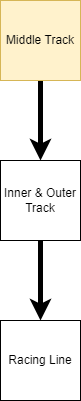

### Function: Initializing Track
Our first function will initialize all of our structs and vectors so we can add relevant segments (turns & straights).

In [80]:
clear all
function track = initializeTrack()
    % initialize vectors
    track.inner.S = []; 
    track.inner.K = [];
    track.middle.S = []; 
    track.middle.K = [];
    track.outer.S = []; 
    track.outer.K = [];
    track.RacingLine.S = []; 
    track.RacingLine.K = [];
    
    % prepopulate with values of 0 for initial station point
    track.inner.S(1) = 0; 
    track.inner.K(1) = 0;
    track.middle.S(1) = 0; 
    track.middle.K(1) = 0;
    track.outer.S(1) = 0; 
    track.outer.K(1) = 0;
    track.RacingLine.S(1) = 0; 
    track.RacingLine.K(1) = 0;
end

Unit test for initializeTrack() function. Want to make sure that each of our sub structs are initialized.

In [81]:
test = initializeTrack()

test =

  scalar structure containing the fields:

    inner =

      scalar structure containing the fields:

        S = 0
        K = 0

    middle =

      scalar structure containing the fields:

        S = 0
        K = 0

    outer =

      scalar structure containing the fields:

        S = 0
        K = 0

    RacingLine =

      scalar structure containing the fields:

        S = 0
        K = 0




### Function(s): Adding A Straight Segement
This next set of functions will work to add a straight segment to our track struct. This will be achomplished by using two seperate functions. One function actually add the straight & one function will automate adding the straight to each of the track's sub structs.

In [82]:
function [S,K] = addStraight(S_current,K_current,lengthStraight,KStraight)
    N = length(S_current);
    fudge = 0.001;
    S_current(N+1) = S_current(N)+fudge;
    K_current(N+1) = KStraight;
    S_current(N+2) = S_current(N+1)+lengthStraight+fudge;
    K_current(N+2) = KStraight;
    S = S_current;
    K = K_current;
end

Unit test for one length to make sure we are adding to our straight values. This will be a manual test of calling specific structs before further functionalizing this shortly:

In [83]:
test = initializeTrack();
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,4,0);
test.middle.S,test.middle.K

ans =

   0.00000   0.00100   4.00200

ans =

   0   0   0



### Function(s): Adding A Turn Segment
This next set of functions will work to add a turn to our track along the outer and inner curvitures of the track. This function will be where we account for the width of the track. The first turn function we will build is the adding the outer curviture of the track.

In [84]:
function [S,K] = addTurn(S_cur,K_cur,RTurn,thetaTurn)
    N = length(S_cur);
    fudge = 0.001;
    KTurn = 1/RTurn;
    STurn = abs(thetaTurn*RTurn); % arc length
    S_cur(N+1) = S_cur(N)+fudge;
    S_cur(N+2) = S_cur(N+1)+STurn+fudge;
    
    if thetaTurn <=0
        K_cur(N+1) = -KTurn;
        K_cur(N+2) = -KTurn;
    else
        K_cur(N+1) = KTurn;
        K_cur(N+2) = KTurn;  
    end
    S = S_cur;
    K = K_cur;
end

Another unit test:

In [85]:
test = initializeTrack();
RTurn = 1;
theta_turn = pi;
[test.middle.S,test.middle.K] = addTurn(test.outer.S, test.outer.K,RTurn,theta_turn);
test.middle.S,test.middle.K

ans =

   0.00000   0.00100   3.14359

ans =

   0   1   1



### Function: Building A High Resolution Map
Now we using code provided by Professor Alexander Brown we will create a high resolution map of our track using the interp1 function within Octave.

In [86]:
function [track] = fillTrack(S,K,int_positions)
    nu(1) = int_positions.nu;
    X(1) = int_positions.X;
    Y(1) = int_positions.Y;
    %build a high resolution map
    Sq = min(S):.01:max(S);
    Kq = interp1(S,K,Sq);

    for k = 2:length(Sq)
       nu(k) = nu(k-1) + Kq(k-1)*(Sq(k)-Sq(k-1));
       X(k) = X(k-1) + (Sq(k)-Sq(k-1))*cos(nu(k-1));
       Y(k) = Y(k-1) + (Sq(k)-Sq(k-1))*sin(nu(k-1));
    end

    track.heading = nu;
    track.X = X;
    track.Y = Y;
    track.S = Sq;
    track.K = Kq;
end

Unit test to ensure that we can build the high resolution map. Specifically we will look to make sure we have the correct station and curviture. Additionally we will plot the X & Y of our track to ensure we have the correct mapping of the track we actually want.

ans =  0.031853
ans =  40.001
ans =  3.1415


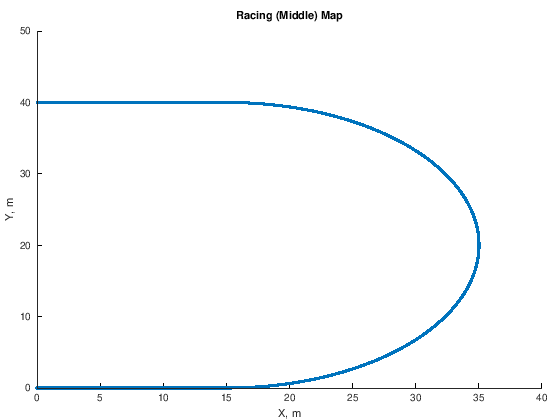

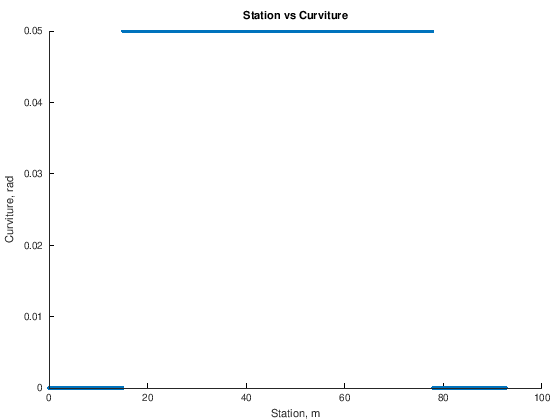

In [87]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
w_test = 5;
Kstraight = 0;
straight = 15;
int_position.X = 0;
int_position.Y = 0;
int_position.nu = 0;
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position);
figure()
hold on
title("Station vs Curviture")
xlabel("Station, m")
ylabel("Curviture, rad")
plot(test.middle.S,test.middle.K,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

figure()
hold on
title("Racing (Middle) Map")
xlabel("X, m")
ylabel("Y, m")
plot(test.middle.X,test.middle.Y,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off
test.middle.X(end)
test.middle.Y(end)
test.middle.heading(end)

### Function: Building A High Resolution Map (Moving Backwards)
This function will build a high resolution map of our track from an initial point incrementing moving backwards. This function will be crucial for constructing our racing line.

In [88]:
function [track] = fillBackwardsTrack(S,K,int_positions)
    nu(1) = int_positions.nu;
    X(1) = int_positions.X;
    Y(1) = int_positions.Y;
    %build a high resolution map
    Sq = max(S):-.01:min(S);
    Kq = interp1(S,K,Sq);

    for k = 2:length(Sq)
       nu(k) = nu(k-1) + Kq(k-1)*(Sq(k)-Sq(k-1));
       X(k) = X(k-1) + (Sq(k)-Sq(k-1))*cos(nu(k-1));
       Y(k) = Y(k-1) + (Sq(k)-Sq(k-1))*sin(nu(k-1));
    end

    track.heading = nu;
    track.X = X;
    track.Y = Y;
    track.S = Sq;
    track.K = Kq;
end

Now we will perform a unit test to recreate the same track from above.

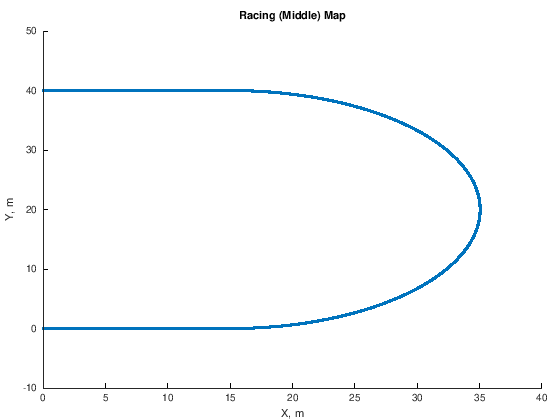

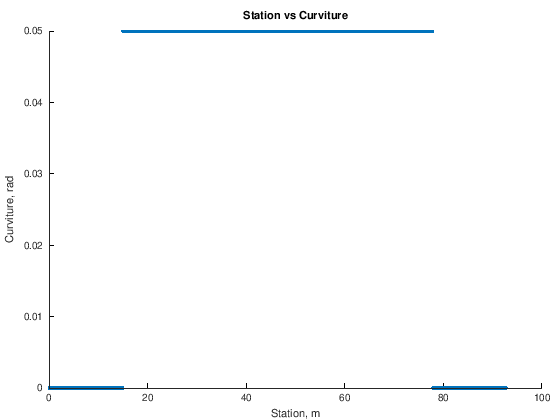

In [89]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
w_test = 5;
Kstraight = 0;
straight = 15;
int_position.X = 0.031853;
int_position.Y = 40.001;
int_position.nu = 3.1415;
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
[test.middle.S,test.middle.K] = addStraight(test.middle.S,test.middle.K,straight,Kstraight);
test.middle = fillBackwardsTrack(test.middle.S,test.middle.K,int_position);
figure()
hold on
title("Station vs Curviture")
xlabel("Station, m")
ylabel("Curviture, rad")
plot(test.middle.S,test.middle.K,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

figure()
hold on
title("Racing (Middle) Map")
xlabel("X, m")
ylabel("Y, m")
plot(test.middle.X,test.middle.Y,".")
%ylim([-5 30])
%daspect([1 1 1])
hold off

## Building The Outer & Inner Track
Now that we have our middle line initialized we will move towards developing our inner & outer tracks based on a specified track width.
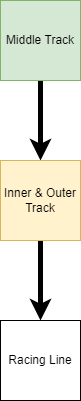

### Function: Adding Inner & Outer Turns
Our next function will make use of our current add turn function to account for the width of the track and construct an inner & outer "track" to make our track more physically real. 
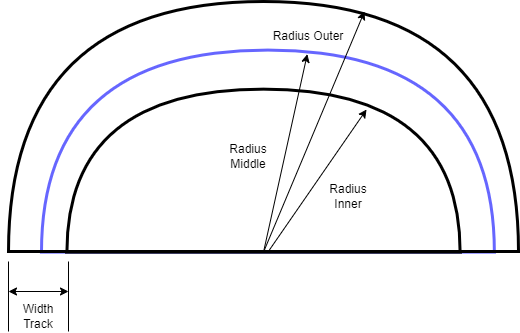
Using the image above as a reference, our outer radius is a function of track width and the radius of the middle track.
$$ R_{outer} = R_{middle} + \frac{width_{track}}{2} $$
Repeating the same process we can determine the radius of our inner track.
$$ R_{inner} = R_{middle} - \frac{width_{track}}{2} $$
Functionalized we can represent our inner and outer turns. Additionally, there is logic built into this function to determine which track needs the larger radius based on the previous angle of the turn.

In [90]:
function track = InnerAndOuterTurns(track,width_track,RTurn,theta_turn,theta_turn_last)
    RadOuter = RTurn+width_track/2;
    RadInner = RTurn-width_track/2;
    bool_decide = sign(theta_turn)==sign(theta_turn_last);
    if bool_decide
        [track.outer.S,track.outer.K] = addTurn(track.outer.S,track.outer.K,RadOuter,theta_turn);
        [track.inner.S,track.inner.K] = addTurn(track.inner.S,track.inner.K,RadInner,theta_turn);
    else
        [track.outer.S,track.outer.K] = addTurn(track.outer.S,track.outer.K,RadInner,theta_turn);
        [track.inner.S,track.inner.K] = addTurn(track.inner.S,track.inner.K,RadOuter,theta_turn);
    end
end

In [91]:
sign(-pi/2)==sign(pi/2)

ans = 0


Now we will preform a unit test and to ensure that our function works.

In [92]:
test = initializeTrack();
RTurn = 20;
theta_turn = pi;
previous_theta = pi;
w_test = 5;
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn,previous_theta);
test.outer.K
test.inner.K

ans =

   0.000000   0.044444   0.044444

ans =

   0.000000   0.057143   0.057143



The function works! This can be seen as how our curvature values for our inner radius are larger than the outer track. Additionally, we can see that our station is smaller than our outer station which makes sense because the station is incrimented by a smaller radius. As a quick test we are going to plot fill our track and initialize our outer and inner values with half of the track width in order to make position works.

ans =

  scalar structure containing the fields:

    X = 0
    Y =  2.5000
    nu = 0



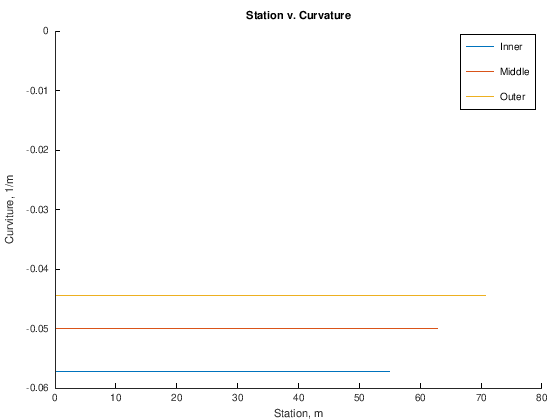

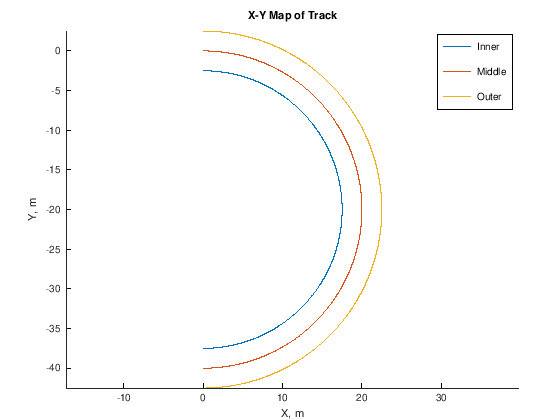

In [93]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;
width_track = 5;
int_position.inner.X = 0;
int_position.inner.Y = -width_track/2;
int_position.inner.nu = 0;
int_position.outer.X = 0;
int_position.outer.Y = width_track/2;
int_position.outer.nu = 0;
int_position.outer
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
int_position.middle.X = 0;
int_position.middle.Y = 0;
int_position.middle.nu = 0;
test.middle = fillTrack(test.middle.S,test.middle.K,int_position.middle);
figure()
hold on
title("X-Y Map of Track")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


figure()
hold on
title("Station v. Curvature")
xlabel("Station, m")
ylabel("Curviture, 1/m")
plot(test.inner.S,test.inner.K)
plot(test.middle.S,test.middle.K)
plot(test.outer.S,test.outer.K)
%axis equal
hold off
legend("Inner", "Middle","Outer")

This works, which is great! but while playing with this test, I identified an issue where we need to change the signage on each of the initial poistions whenever the sign of the angle changes. As such, we will construct a mini-function in order to prevent this issue in the future.

### Function: Getting Correct Initial Positions
This function will assign the correct initial position for our inner & outer tracks based on the angle of the first turn within a track. This will make sure that we have the correct X & Y values.

In [94]:
function int_positions = assignIntPosition(int_positions,width,ThetaTurn)
    %trackIntInfo = [];
    i = 1;
    while ThetaTurn(i) == 0
        i = i+1
    end
    
    if ThetaTurn(i) >=0;
        int_positions.inner.Y = width/2;
        int_positions.outer.Y = -width/2;
    else
        int_positions.outer.Y = width/2;
        int_positions.inner.Y = -width/2;
    end
end

Another unit test in the context of our previous unit test.

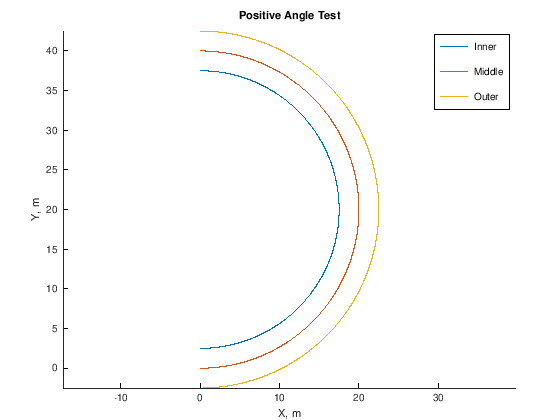

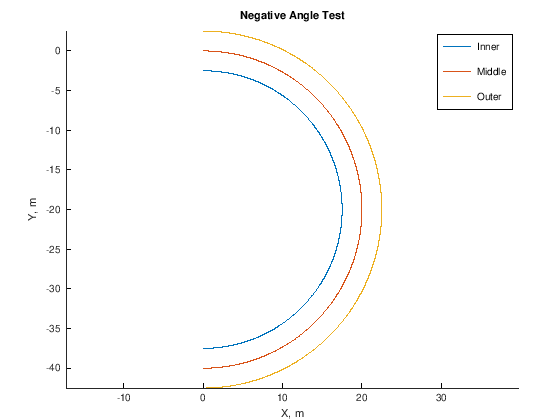

In [95]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;

w_test = 5;
int_positon = assignIntPosition(int_position,w_test,theta_turn);

test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position.middle);
figure()
hold on
title("Negative Angle Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


test = initializeTrack();
RTurn = 20;
theta_turn = pi;

w_test = 5;
int_position2 = assignIntPosition(int_position,w_test,theta_turn);

test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_position2.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_position2.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_position2.middle);
figure()
hold on
title("Positive Angle Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")

Both of our tests work! Now we will check to make sure our add straight function works for new inner and outer tracks with our add straight function.

### Function: Adding Straights To Each Sub Struct
This next function will automate adding a straight to each of our sub structs at once by calling the add straight function three times in one function

In [96]:
function track = AddTrackStraights(track,straight,Kstraight)
    [track.inner.S,track.inner.K] = addStraight(track.inner.S,track.inner.K,straight,Kstraight);
    [track.outer.S,track.outer.K] = addStraight(track.outer.S,track.outer.K,straight,Kstraight);
    [track.middle.S,track.middle.K] = addStraight(track.middle.S,track.middle.K,straight,Kstraight);
end

Unit test once again.

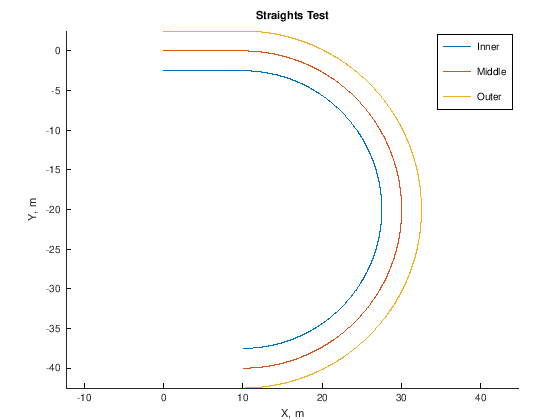

In [97]:
test = initializeTrack();
RTurn = 20;
theta_turn = -pi;
straight = 10;
Kstraight = 0;
w_test = 5;
int_positions = assignIntPosition(int_position,w_test,theta_turn);
test = AddTrackStraights(test,straight,Kstraight);
test = InnerAndOuterTurns(test,w_test,RTurn,theta_turn,theta_turn);
test.inner = fillTrack(test.inner.S,test.inner.K,int_positions.inner);
test.outer = fillTrack(test.outer.S,test.outer.K,int_positions.outer);
[test.middle.S,test.middle.K] = addTurn(test.middle.S,test.middle.K,RTurn,theta_turn);
test.middle = fillTrack(test.middle.S,test.middle.K,int_positions.middle);
figure()
hold on
title("Straights Test")
xlabel("X, m")
ylabel("Y, m")
plot(test.inner.X,test.inner.Y)
plot(test.middle.X,test.middle.Y)
plot(test.outer.X,test.outer.Y)
axis equal
hold off
legend("Inner", "Middle","Outer")


Our function works! Now we will work to automate our Inner and Outer track functions as one function that we can run once in a for loop.

### Function: Automating Track Construction
Making use of a for loop, we will construct our track with the call of one function. This will function will only be provided by three arrays: one of lengths, one of turns, and one of angles of turns.

In [98]:
function track = BuildTrack(lengths,theta,width_track,int_position)
    track = initializeTrack();
    int_position = assignIntPosition(int_position,width_track,theta);
    previous_theta = nonzeros(theta);
    previous_theta = [previous_theta(1); previous_theta];
    j = 1;
    for i = 1:length(lengths)
        if abs(theta(i)) > 0
            track = InnerAndOuterTurns(track,width_track,lengths(i),theta(i),previous_theta(j));
            [track.middle.S,track.middle.K] = addTurn(track.middle.S,track.middle.K,lengths(i),theta(i));
            j = j+1;
        else
            track = AddTrackStraights(track,lengths(i),theta(i));
        end

        track.inner = fillTrack(track.inner.S,track.inner.K,int_position.inner);
        track.outer = fillTrack(track.outer.S,track.outer.K,int_position.outer);
        track.middle = fillTrack(track.middle.S,track.middle.K,int_position.middle);
    end
end

Another unit test, this time we expect to built a simple track with two turns and two straights.

i =  2


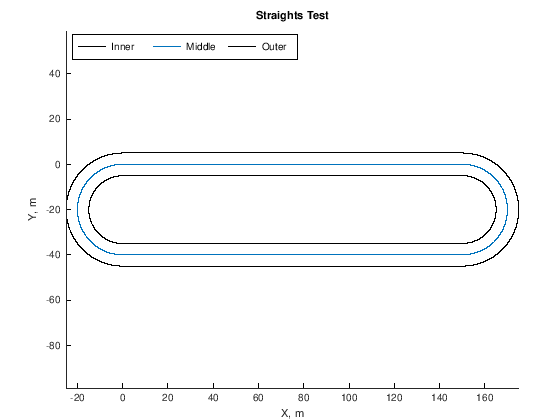

In [99]:
lengths = [150, 20, 150, 20, 1];
theta = [0, -pi, 0, -pi, 0];

width_track = 10;
track = BuildTrack(lengths,theta,width_track,int_positions);

figure()
hold on
title("Straights Test")
xlabel("X, m")
ylabel("Y, m")
plot(track.inner.X,track.inner.Y,"k")
plot(track.middle.X,track.middle.Y)
plot(track.outer.X,track.outer.Y,"k")
axis equal
hold off
legend("Inner", "Middle","Outer","Location","northwest","orientation","horizontal")


In [100]:
lengths = [150,30,80,30,80];
theta = [0,pi/2,0,-pi/2,0];
length(lengths)
length(theta)

ans =  5
ans =  5


In [101]:
width_track = 10;
edge_case_track = BuildTrack(lengths,theta,width_track,int_positions);

i =  2


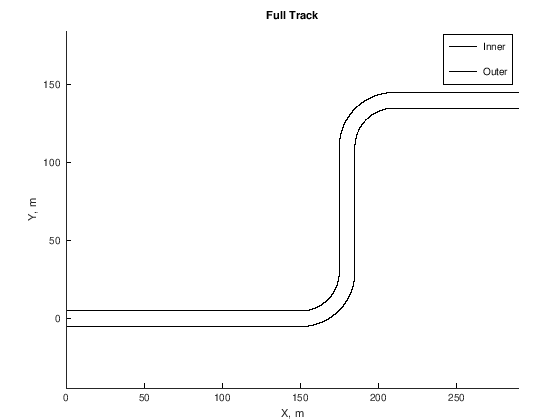

In [102]:
figure()
hold on
title("Full Track")
xlabel("X, m")
ylabel("Y, m")
plot(edge_case_track.inner.X,edge_case_track.inner.Y,"k")
plot(edge_case_track.outer.X,edge_case_track.outer.Y,"k")
axis equal
hold off
legend("Inner","Outer")

## Constructing A Racing Line
In this next set of functions we will construct functions based off of work done by Dr. Krisada (Mick) Kritayakirana in his 2012 thesis, [Autonomous Vehicle Control at the Limts of Handling](https://dynamicdesignlab.sites.stanford.edu/sites/g/files/sbiybj9456/f/publications/2012_Thesis_Kritayakirana_Autonomous_Vehicle_Control_at_the_Limits_of_Handling.pdf). Using Dr. Kritayakirana's methodology we will will create a racing line "path" that will create a more realsitic driver model.
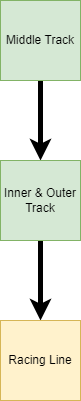
Our first step in this section is to determine points along our constant radius segement for a given turn.

### Function: Deteriming Constant Radius Points And Station Values
This function will use the inner and outer track geometetry and determine the X,Y points for:
1. Apex of the Constant Radius (CR) Segement 
2. Beginning of CR Segement
3. End of CR Segment

These three points will allow us to determine the center point of our constant radius segement as well as the radius and ultimantly necessary angle to estabilish that segment of the racing line. Additionally, this function will return three station and curvature values for our CR segemt. The CR values will ultimantly be overwritten but for now they are being returned. This function makes heavy use of identifying index numbers through logic statemtents and the find function in order to find specific data points within our track data set.

In [103]:
function Apex = GetApexPoints(track)
    % Get Inner Apex Points
    ind_turn_inner = find(diff(track.inner.K)~=0);
    num_turns = length(ind_turn_inner)/2;

    reshape_ind_inner = reshape(ind_turn_inner,2,[]);
    [rows_inner,col]=size(reshape_ind_inner);

    for i = 1:rows_inner
        S_apex_inner(i) = (track.inner.S(reshape_ind_inner(1,i))+track.inner.S(reshape_ind_inner(2,i)))/2;
        K_apex_inner(i) = track.inner.K(reshape_ind_inner(2,i));
    end
    S_inner = track.inner.S;
    X_inner = track.inner.X;
    Y_inner = track.inner.Y;
    heading_inner = track.inner.heading;
    X_dummy_inner = interp1(S_inner,X_inner,S_apex_inner);
    Y_dummy_inner = interp1(S_inner,Y_inner,S_apex_inner);
    heading_dummy_inner = interp1(S_inner,heading_inner,S_apex_inner);
    % Get Outer Apex Points
    ind_turn_outer = find(diff(track.outer.K)~=0);
    num_turns = length(ind_turn_outer)/2;

    reshape_ind_outer = reshape(ind_turn_outer,2,[]);
    [rows_outer,col]=size(reshape_ind_outer);

    for i = 1:rows_outer
        S_apex_outer(i) = (track.outer.S(reshape_ind_outer(1,i))+track.outer.S(reshape_ind_outer(2,i)))/2;
        K_apex_outer(i) = track.outer.K(reshape_ind_outer(2,i));
    end
    S_outer = track.outer.S;
    X_outer = track.outer.X;
    Y_outer = track.outer.Y;
    heading_outer = track.outer.heading;
    X_dummy_outer = interp1(S_outer,X_outer,S_apex_outer);
    Y_dummy_outer = interp1(S_outer,Y_outer,S_apex_outer);
    heading_dummy_outer = interp1(S_outer,heading_outer,S_apex_outer);

    % Determine Which K & S To Use At Each Turn
    comb_apex_K = [K_apex_inner;K_apex_outer];
    comb_apex_S = [S_apex_inner;S_apex_outer];
    X_dummy = [X_dummy_inner;X_dummy_outer];
    Y_dummy = [Y_dummy_inner;Y_dummy_outer];
    heading_dummy = [heading_dummy_inner;heading_dummy_outer];

    [max_comb_apex] = max(abs(comb_apex_K));
    [apex_ind] = find(abs(comb_apex_K)==max_comb_apex);

    Apex.S = comb_apex_S(apex_ind);
    Apex.K = comb_apex_K(apex_ind);
    Apex.X = X_dummy(apex_ind);
    Apex.Y = Y_dummy(apex_ind);
    Apex.heading = heading_dummy(apex_ind);
end

Now we will perform two (!) unit tests for our edgecase track. Our first test will be a syntax test in order to make sure the code runs and we get returned two sets of values.

In [104]:
Apex = GetApexPoints(edge_case_track)

Apex =

  scalar structure containing the fields:

    S =

       169.63
       304.61

    K =

       0.040000
      -0.040000

    X =

       167.68
       192.35

    Y =

        12.312
       127.658

    heading =

       0.78500
       0.78557




Now that our syntax works, we will perform a unit test to plot our apex points and ensure that our computed values match our intution of where the apex of each turn should be (apex at the maximum curvature).

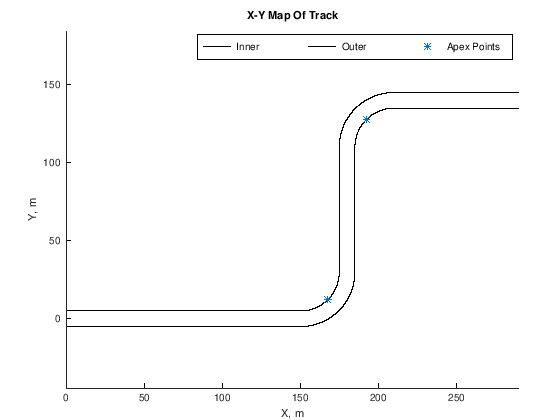

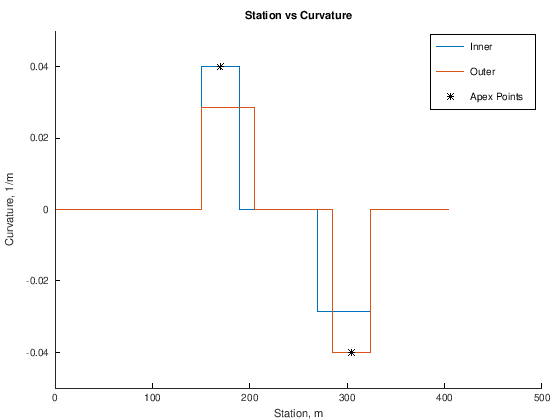

In [105]:
figure()
hold on
title("Station vs Curvature")
plot(edge_case_track.inner.S,(edge_case_track.inner.K))
plot(edge_case_track.outer.S,(edge_case_track.outer.K))
plot(Apex.S,Apex.K,"k*")
xlabel("Station, m")
ylabel("Curvature, 1/m")
ylim([-0.05 0.05])
hold off
legend("Inner","Outer","Apex Points")

figure()
hold on
title("X-Y Map Of Track")
plot(edge_case_track.inner.X,(edge_case_track.inner.Y),"k")
plot(edge_case_track.outer.X,(edge_case_track.outer.Y),"k")
plot(Apex.X,Apex.Y,"*")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off
legend("Inner","Outer","Apex Points","orientation","horizontal")

Just to ensure our function is generalizable we will perform the same test on our oval hairline turn track shown above.

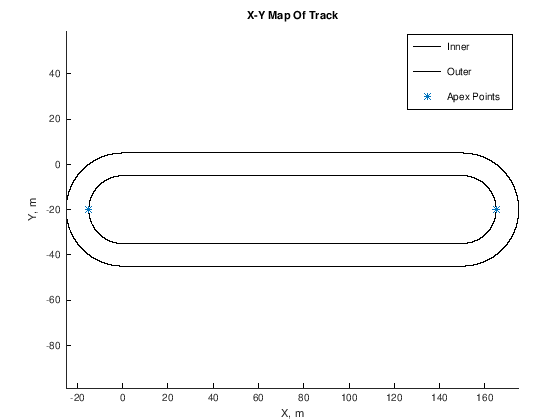

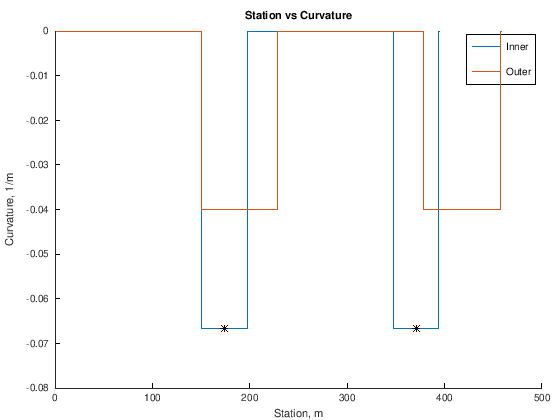

In [106]:
Apex_simple = GetApexPoints(track);

figure()
hold on
title("Station vs Curvature")
plot(track.inner.S,(track.inner.K))
plot(track.outer.S,(track.outer.K))
plot(Apex_simple.S,Apex_simple.K,"k*")
xlabel("Station, m")
ylabel("Curvature, 1/m")
hold off
legend("Inner","Outer")

figure()
hold on
title("X-Y Map Of Track")
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
plot(Apex_simple.X,Apex_simple.Y,"*")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off
legend("Inner","Outer","Apex Points")

Success! We now have a generalizable function to determine the apex points of the inner/outer track for any given track configuration. Now we will find the points that make up our beginning end points of our constant radius segment.

### Function: Finding Start & End of Constant Radius Segment
This function will determine the start and ending point of our constant radius segment for each turn. Additionally, this function will concat our apex data into a singular constant raidus segment struct that will allow us to generate a constant radius segment.

In [107]:
function CR = StartAndEndCR(track,apex)
    ind = find(diff(track.middle.K)~=0);
    num_turns = length(ind)/2;
    ind = reshape(ind,[],2);
    for i = 1:num_turns
        CR(i).S = track.middle.S(ind(:,i));
        CR(i).S = [CR(i).S(1), apex.S(i),CR(i).S(2)];
        CR(i).K = track.middle.K(ind(:,i));
        CR(i).K = [CR(i).K(1), apex.K(i),CR(i).K(2)];
        CR(i).heading = track.middle.heading(ind(:,i));
        CR(i).heading = [CR(i).heading(1), apex.heading(i),CR(i).heading(2)];
        CR(i).X = track.middle.X(ind(:,i));
        CR(i).X = [CR(i).X(1), apex.X(i),CR(i).X(2)];
        CR(i).Y = track.middle.Y(ind(:,i));
        CR(i).Y = [CR(i).Y(1), apex.Y(i),CR(i).Y(2)];
    end
end

Unit test:

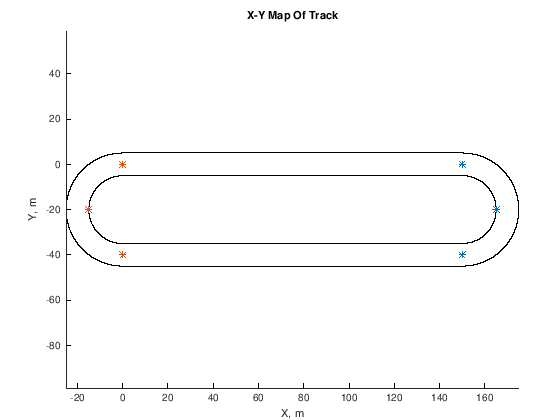

In [108]:
CR = StartAndEndCR(track,Apex_simple);
figure()
hold on
title("X-Y Map Of Track")
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
% plot(Apex_simple.X(2),Apex_simple.Y(2),"*")
plot(CR(1).X,CR(1).Y,"*")
plot(CR(2).X,CR(2).Y,"*")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

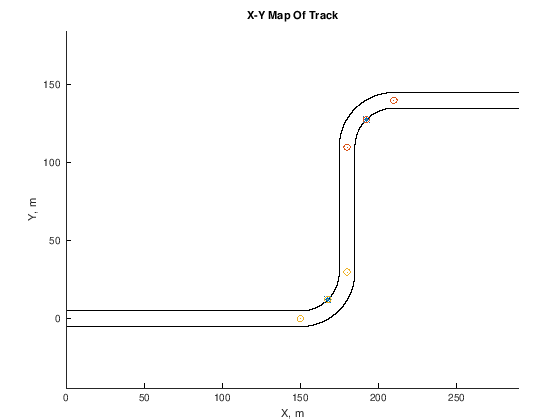

In [109]:
CR_edge = StartAndEndCR(edge_case_track,Apex);
figure()
hold on
title("X-Y Map Of Track")
plot(edge_case_track.inner.X,(edge_case_track.inner.Y),"k")
plot(edge_case_track.outer.X,(edge_case_track.outer.Y),"k")
plot(Apex.X,Apex.Y,"*")
plot(CR_edge(2).X,CR_edge(2).Y,"o")
plot(CR_edge(1).X,CR_edge(1).Y,"o")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

### Function Determing Center of Constant Radius Segment
This function will determine the curvature of our constant radius segment and the center point of constant radius segments. Additionally this function will determine if the curvature of our constant radius segment needs to be positive or negative.

In [110]:
function   [xc,yc,K,theta] = circfit(x,y,K_int)
    xc = ((x(1)^2+y(1)^2)*(y(2)-y(3))+(x(2)^2+y(2)^2)*(y(3)-y(1))+(x(3)^2+y(3)^2)*(y(1)-y(2)))/(2*(x(1)*(y(2)-y(3))-y(1)*(x(2)-x(3))+x(2)*y(3)-x(3)*y(2)));
    yc = ((x(1)^2+y(1)^2)*(x(3)-x(2))+(x(2)^2+y(2)^2)*(x(1)-x(3))+(x(3)^2+y(3)^2)*(x(2)-x(1)))/(2*(x(1)*(y(2)-y(3))-y(1)*(x(2)-x(3))+x(2)*y(3)-x(3)*(y(2))));
    radius = sqrt((xc-x(1))^2+(yc-y(1))^2);
    if K_int>0
        K = 1/radius;
    else
        K = -1/radius;
    end
    K = [K, K, K];
    d_SA = sqrt((x(2)-x(1))^2+(y(2)-y(1))^2);
    theta = acos((2*radius^2-d_SA^2)/(2*radius^2));
    %xc = (ma*mb*(y(1)-y(3))+mb*(x(1)-x(2))-ma*(x(2)+x(3)))/(2*(mb-ma))
end

unit test for our hairline track

In [111]:
[xc_1,yc_1,CR(1).K,CR(1).theta] = circfit(CR(1).X,CR(1).Y,CR(1).K);
[xc_2,yc_2,CR(2).K,CR(2).theta] = circfit(CR(2).X,CR(2).Y,CR(2).K);

visual unit test

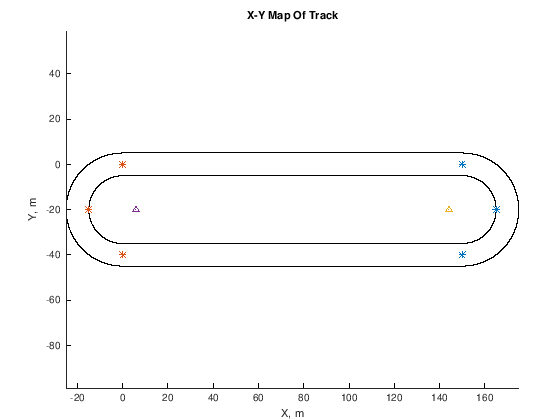

In [112]:
figure()
hold on
title("X-Y Map Of Track")
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
% plot(Apex_simple.X(2),Apex_simple.Y(2),"*")
plot(CR(1).X,CR(1).Y,"*")
plot(CR(2).X,CR(2).Y,"*")
plot(xc_1,yc_1,"^")
plot(xc_2,yc_2,"^")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

Unit test for our edge case track

In [113]:
[xc_1_edge,yc_1_edge,CR_edge(1).K,CR_edge(1).theta] = circfit(CR_edge(1).X,CR_edge(1).Y,CR_edge(1).K);
[xc_2_edge,yc_2_edge,CR_edge(2).K,CR_edge(2).theta] = circfit(CR_edge(2).X,CR_edge(2).Y,CR_edge(2).K);

Visual unit test

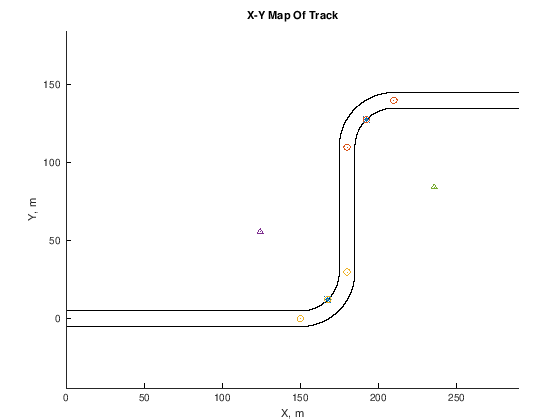

In [114]:
figure()
hold on
title("X-Y Map Of Track")
plot(edge_case_track.inner.X,(edge_case_track.inner.Y),"k")
plot(edge_case_track.outer.X,(edge_case_track.outer.Y),"k")
plot(Apex.X,Apex.Y,"*")
plot(CR_edge(2).X,CR_edge(2).Y,"o")
plot(CR_edge(1).X,CR_edge(1).Y,"o")
plot(xc_1_edge,yc_1_edge,"^")
plot(xc_2_edge,yc_2_edge,"^")
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

### Function: Plotting CR Circle
This is a quick function that will allow us to plot the constant radius segment of our racing line to ensure that we are getting an acceptable constant radius segment when compared to a full circle drawn from our center point.

In [115]:
function [xunit, yunit] = circle(x,y,r)
    th = 0:pi/50:2*pi;
    xunit = r * cos(th) + x;
    yunit = r * sin(th) + y;
end

Unit test for our hairline track

In [116]:
[X_CR_circle_1, Y_CR_circle_1] = circle(xc_1,yc_1,(1/CR(1).K(1)));
[X_CR_circle_2, Y_CR_circle_2] = circle(xc_2,yc_2,(1/CR(2).K(1)));


Unit test for our edge case track

In [174]:
[X_CR_circle_1_edge, Y_CR_circle_1_edge] = circle(xc_1_edge,yc_1_edge,(1/CR_edge(2).K(1)));
[X_CR_circle_2_edge, Y_CR_circle_2_edge] = circle(xc_2_edge,yc_2_edge,(1/CR_edge(2).K(1)));

Visual Unit test for hairline track

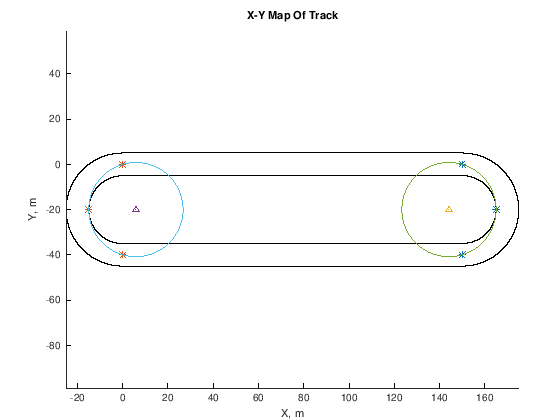

In [175]:
figure()
hold on
title("X-Y Map Of Track")
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
% plot(Apex_simple.X(2),Apex_simple.Y(2),"*")
plot(CR(1).X,CR(1).Y,"*")
plot(CR(2).X,CR(2).Y,"*")
plot(xc_1,yc_1,"^")
plot(xc_2,yc_2,"^")
plot(X_CR_circle_1, Y_CR_circle_1)
plot(X_CR_circle_2, Y_CR_circle_2)
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

Visual unit test for edge case track

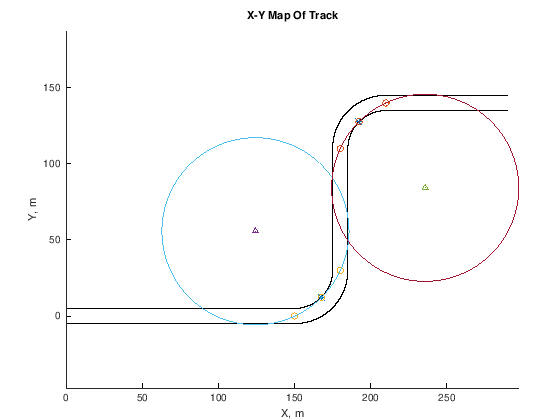

In [176]:
figure()
hold on
title("X-Y Map Of Track")
plot(edge_case_track.inner.X,(edge_case_track.inner.Y),"k")
plot(edge_case_track.outer.X,(edge_case_track.outer.Y),"k")
plot(Apex.X,Apex.Y,"*")
plot(CR_edge(2).X,CR_edge(2).Y,"o")
plot(CR_edge(1).X,CR_edge(1).Y,"o")
plot(xc_1_edge,yc_1_edge,"^")
plot(xc_2_edge,yc_2_edge,"^")
plot(X_CR_circle_1_edge, Y_CR_circle_1_edge)
plot(X_CR_circle_2_edge, Y_CR_circle_2_edge)
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

### Function: Finding Proper Initial Heading For CR Segment
This function makes se of our CR theta found from our circlefit function to determine our initial heading for our constant radius segment.
**ADD PICTURE WITH GEOMETRY LATER**

$$ \nu_{Start} = \nu_{Middle Track} - (\frac{\pi}{2}-\theta) $$

In [165]:
function [CR,nu_start] = ProperHeading(CR)
    nu_start = CR.heading(2) - (pi/2-CR.theta);
    delta_S_CR = 2*CR.theta*(1/abs(CR.K(1)));
    CR.S(3)=CR.S(1)+delta_S_CR;
end

Unit test

In [197]:
[CR(1),nu_start]= ProperHeading(CR(1));
CR(1).nu_start = nu_start;
[CR(2),nu_start]= ProperHeading(CR(2));
CR(2).nu_start = nu_start;
[CR_edge(2),nu_start]= ProperHeading(CR_edge(2));
CR_edge(2).nu_start = nu_start;


Now we will construct our constant radius segment using our fillTrack & fillBackwards track functions by locally zeroing our station at the apex of each turn.

In [206]:
int_test.X = CR(1).X(1); int_test.Y = CR(1).Y(1); int_test.nu = CR(1).nu_start(1);
CR_test =fillBackwardsTrack(CR(1).S,CR(1).K,int_test);

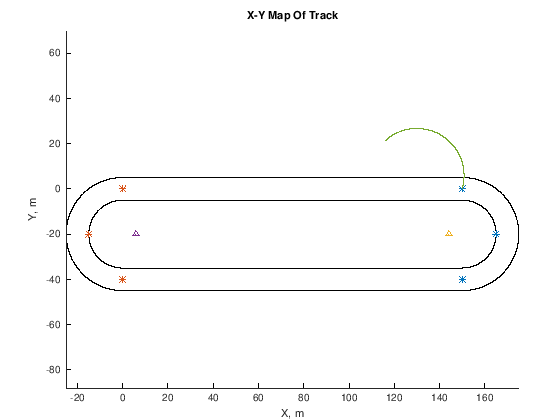

In [208]:
figure()
hold on
title("X-Y Map Of Track")
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
% plot(Apex_simple.X(2),Apex_simple.Y(2),"*")
plot(CR(1).X,CR(1).Y,"*")
plot(CR(2).X,CR(2).Y,"*")
plot(xc_1,yc_1,"^")
plot(xc_2,yc_2,"^")
plot(CR_test.X,CR_test.Y)
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off

### Function: Determining How Far To Move From Our Apex Points
Using the information detailed in Dr. Kritayakirana's thesis we know the following relationship 
$$ \Delta K = 2c^2 \Delta S $$
Where c is our constant clothoid parameter that we can specify. Rewriting this relationship we can determine our  our $ \Delta S $ which will allow us to determine the "starting point" and "ending point" of each turn. Our rewritten equation reads:
$$ \Delta S = \frac{\Delta K}{2c^2} $$
This function will be built around a single query value in order to debug more easily. A future function will call this function for all apex points.

In [124]:
function delta_S = Clothoid(S_apex,K_apex,c)
    delta_K = abs(K_apex-0);
    delta_S = delta_K/(2*c^2);
end

First we will unit test our function to ensure that we don't throw any syntax errors. We will perform this test for both of the station values in our Apex Str

In [125]:
c = .023;
delta_S_test = Clothoid(Apex.S(1),Apex.K(1),c)
delta_S_test2 = Clothoid(Apex.S(2),Apex.K(2),c)

delta_S_test =  37.807
delta_S_test2 =  37.807


Now we will perform a set of calculations for each turn to attempt to plot the clothoid segemnt in the following code block. These calculations are non pysical (station for each "turn" is initialized at zero). 

In [126]:
% First Turn Calculations:
S_test = [0,delta_S_test];
K_test = [Apex.K(1), 0];
S_rampup = [-delta_S_test,0];
K_rampup = [0,Apex.K(1)];
int_test.X = Apex.X(1); int_test.Y = Apex.Y(1); int_test.nu = Apex.heading(1);
dummy = fillTrack(S_test,K_test,int_test);

tango = fillBackwardsTrack(S_rampup,K_rampup,int_test);

% Second Turn Calculations:
S_test2 = [0,delta_S_test2]+delta_S_test;
K_test2 = [Apex.K(2), 0];
S_rampup2 = [-delta_S_test2, 0]+max(delta_S_test);
K_rampup2 = [0,Apex.K(2)];

int_test2.X = Apex.X(2); int_test2.Y = Apex.Y(2); int_test2.nu = Apex.heading(2);
dummy2 = fillTrack(S_test2,K_test2,int_test2);
tango2 = fillBackwardsTrack(S_rampup2,K_rampup2,int_test2);

% ind = find((dummy.S>0));
% dummy.K(ind) = Apex.K(1);

% dummy = fillTrack(dummy.S,dummy.K,int_test);
% plot(dummy.S,dummy.K,".")

Finally, we will plot our track map on our edge case track to ensure our calculations align with visual intution once again.

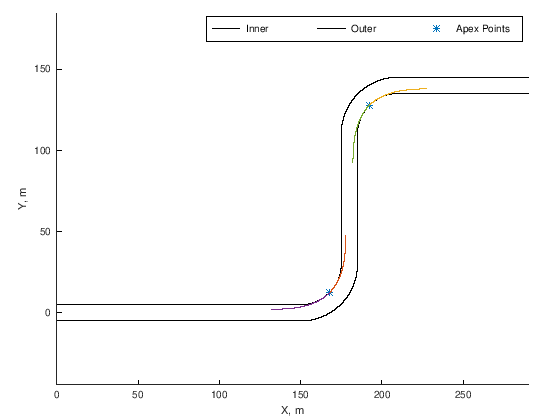

In [127]:
figure()
hold on
plot(edge_case_track.inner.X,(edge_case_track.inner.Y),"k")
plot(edge_case_track.outer.X,(edge_case_track.outer.Y),"k")
plot(Apex.X,Apex.Y,"*")
plot(dummy.X,dummy.Y)
plot(dummy2.X,dummy2.Y)
plot(tango.X,tango.Y)
plot(tango2.X,tango2.Y)
xlabel("X, m")
ylabel("Y, m")
% xlim([100 200])
% ylim([-10 90])
axis equal
hold off
legend("Inner","Outer","Apex Points","orientation","horizontal")

As a note of good house keeping we will once again check our work on the simple track to ensure that our solution works on a diffrent track. It is important to note that we will have to change our clothoid parameter (c) to fit within the bounds of our simple track.

delta_S_test =  13.883
delta_S_test2 =  13.883


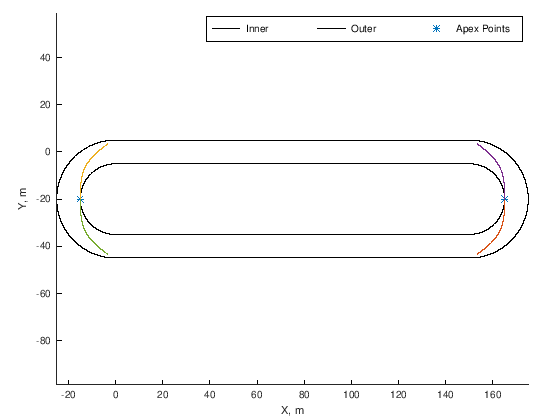

In [128]:
c = .049; % UPDATED C VALUE
delta_S_test = Clothoid(Apex_simple.S(1),Apex_simple.K(1),c)
S_test = [-delta_S_test,0,delta_S_test];
K_test = [0, Apex_simple.K(1), 0];
int_test.X = Apex_simple.X(1); int_test.Y = Apex_simple.Y(1); int_test.nu = Apex_simple.heading(1);
dummy = fillTrack(S_test,K_test,int_test);
tango = fillBackwardsTrack(S_test,K_test,int_test);

delta_S_test2 = Clothoid(Apex_simple.S(2),Apex_simple.K(2),c)
S_test2 = [-delta_S_test2,0,delta_S_test2]+delta_S_test;
K_test2 = [0, Apex_simple.K(2), 0];
int_test2.X = Apex_simple.X(2); int_test2.Y = Apex_simple.Y(2); int_test2.nu = Apex_simple.heading(2);
dummy2 = fillTrack(S_test2,K_test2,int_test2);
tango2 = fillBackwardsTrack(S_test2,K_test2,int_test2);
figure()
hold on
plot(track.inner.X,(track.inner.Y),"k")
plot(track.outer.X,(track.outer.Y),"k")
plot(Apex_simple.X,Apex_simple.Y,"*")
plot(dummy.X,dummy.Y)
plot(dummy2.X,dummy2.Y)
plot(tango.X,tango.Y)
plot(tango2.X,tango2.Y)
xlabel("X, m")
ylabel("Y, m")
axis equal
hold off
legend("Inner","Outer","Apex Points","orientation","horizontal")


It works! By validating on our simple track, we know our solution generalizes (with the exception of the c paramater). Future iterations of this code will update the c parameter to ensure the clothoid fits within the track no matter the radius of the turn or the angle of the turn. Our next step will be to automate the construction of the clothoid sections of each turn.

### Function: Automating Clothoid Construction
This function will automate the construction of our clothoid bits for each turn. Additionally, this function will attempt to connect the clothoid segments into one contuinious racing line in between turns.

In [129]:
function [RampUp,RampDown] = ConstructTurns(Apex,c)
    for i =1:length(Apex.S)
        delta_S_test(i) = Clothoid(Apex.S(i),Apex.K(i),c);
        S_RampUp = [-delta_S_test(i),0];
        K_RampUp = [0, Apex.K(i)];
        S_RampDown = [0.01,delta_S_test(i)];
        K_RampDown = [Apex.K(i),0];
        int_test.X = Apex.X(i); int_test.Y = Apex.Y(i); int_test.nu = Apex.heading(i);
        RampDown.turn(i) = fillTrack(S_RampDown,K_RampDown,int_test);
        RampUp.turn(i) = fillBackwardsTrack(S_RampUp,K_RampUp,int_test);
    end
end

In [130]:
c = 0.026;
[RU,RD] = ConstructTurns(Apex_simple,c);
% c = 0.022;
% [RU_edge,RD_edge] = ConstructTurns(Apex,c);

ans =  24.044
ans = -0.57647
ans = -6.3550


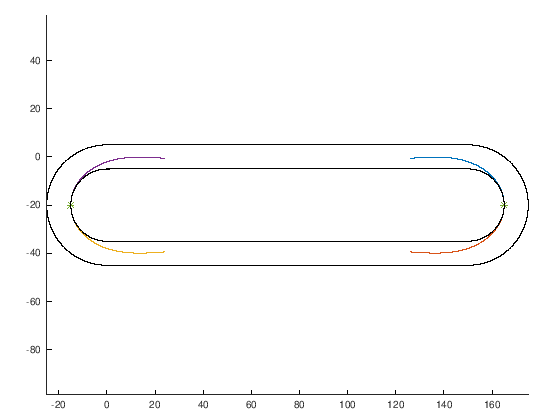

In [131]:
figure()
hold on
plot(RU.turn(1).X,RU.turn(1).Y)
plot(RD.turn(1).X,RD.turn(1).Y)
plot(RU.turn(2).X,RU.turn(2).Y)
plot(RD.turn(2).X,RD.turn(2).Y)
plot(Apex_simple.X,Apex_simple.Y,"*")
plot(track.inner.X,track.inner.Y,"k")
plot(track.outer.X,track.outer.Y,"k")
% plot(track.middle.X,track.middle.Y,"r")
axis equal
hold off
RD.turn(2).X(end)
RD.turn(2).Y(end)
RD.turn(2).heading(end)

Straight_Connect =  142.29
Straight_Connect2 =  142.30


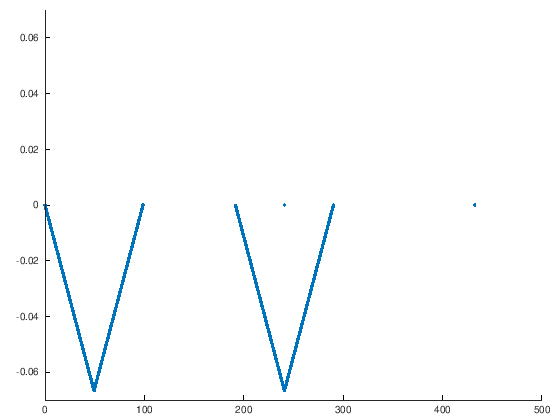

In [132]:

S = [RU.turn(1).S, RD.turn(1).S];
S = S-min(S);
K = [RU.turn(1).K, RD.turn(1).K];
X = [RU.turn(1).X, RD.turn(1).X];
Y = [RU.turn(1).Y, RD.turn(1).Y];
Heading = [RU.turn(1).heading, RD.turn(1).heading];
Straight_Connect = sqrt((RU.turn(2).X(1)-RD.turn(1).X(end))^2+(RU.turn(2).Y(1)-RD.turn(1).Y(end))^2)
[S,K] = addStraight(S,K,Straight_Connect,0);
S = [S,((RU.turn(2).S)+S(end)),((RD.turn(2).S)+S(end))];
K = [K,(RU.turn(2).K),(RD.turn(2).K)];

Straight_Connect2 = sqrt((RU.turn(1).X(1)-RD.turn(2).X(end))^2+(RU.turn(1).Y(1)-RD.turn(2).Y(end))^2)
[S,K] = addStraight(S,K,Straight_Connect2,0);
figure()
hold on
plot(S,K,".")
ylim([-0.07 0.07])
int_pos_RL.X =  14.973;
int_pos_RL.Y =  2.8398;
int_pos_RL.nu = -6.0793;
racing_line = fillTrack(S,K,int_pos_RL);

ans = -0.57816
ans = -0.57647


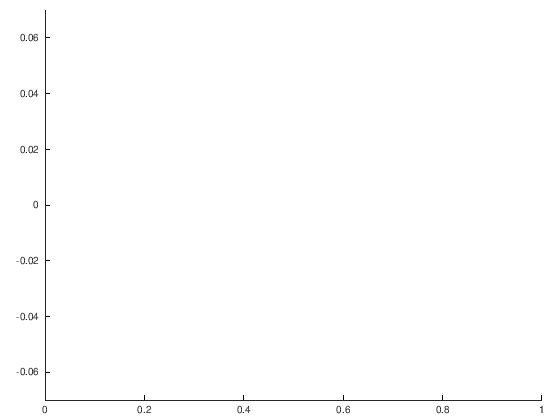

In [133]:
S=[0];
K=[0];
int_pos_RL.X = 75;int_pos_RL.Y = 2.8587; int_pos_RL.nu= 0;
First_straight = sqrt((RU.turn(2).X(1)-int_pos_RL.X)^2+(RU.turn(2).Y(1)-int_pos_RL.Y)^2)/2;
RU.turn(1).Y(end)
RD.turn(2).Y(end)
[S,K] = addStraight(S,K,First_straight,0);
S_turn = [RU.turn(1).S, RD.turn(1).S];
S_turn = S_turn-min(S_turn);
S = [S,S_turn+S(end)];
K = [K,RU.turn(1).K, RD.turn(1).K];

Straight_Connect = sqrt((RU.turn(2).X(1)-RD.turn(1).X(end))^2+(RU.turn(2).Y(1)-RD.turn(1).Y(end))^2);
[S,K] = addStraight(S,K,Straight_Connect,0);
S_turn_2 = [(RU.turn(2).S),(RD.turn(2).S)];
S_turn_2=S_turn_2-min(S_turn_2);
S = [S,S_turn_2+S(end)];
K = [K,(RU.turn(2).K),(RD.turn(2).K)];
Straight_Connect2 = sqrt((RU.turn(1).X(1)-RD.turn(2).X(end))^2+(RU.turn(1).Y(1)-RD.turn(2).Y(end))^2)/2;
[S,K] = addStraight(S,K,Straight_Connect2,0);
% figure()
% hold on
% plot(S,K,".")
ylim([-0.07 0.07])
racing_line = fillTrack(S,K,int_pos_RL);
% plot(racing_line.S)

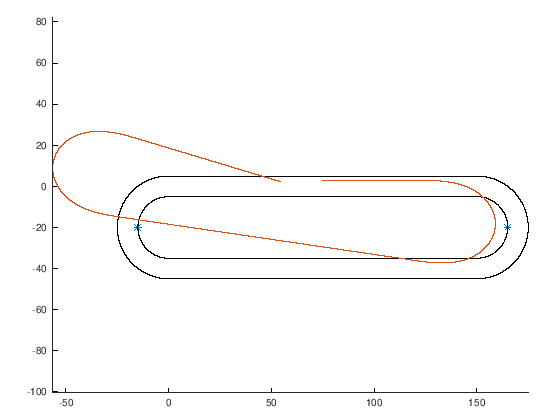

In [134]:
figure()
hold on
plot(Apex_simple.X,Apex_simple.Y,"*")
plot(track.inner.X,track.inner.Y,"k")
plot(track.outer.X,track.outer.Y,"k")
plot(racing_line.X,racing_line.Y)
axis equal